In [1]:
%%html
<link rel="stylesheet" type="text/css" href="rise.css" />

Some images from **An Introduction to Statistical Learning**
available at https://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 12

# K-Nearest Neighbors (KNN) Regression

**Learning goals**
- You will be able to fit nonlinear {X0, X1, X2, ...} vs. Y data with a KNN model.
- You will be able to predict the Y value for new {X0, X1, X2, ...} values.
- You will appreciate that although a KNN model can be used to explain or predict lots of arbitrary nonlinear relations, it is less obvious what the model means.

K-Nearest Neighbors (KNN) regression

Model prediction is the mean of the K nearest data points.

![](images/knn-vs-line.png)

KNN can be used to model any kind of relation.

![](images/knn-curve.png)

Consider data with multiple features.

True relationship (blue) and linear model (yellow).

![](images/ols-surface.png)

KNN models for multiple features.

![](images/knn-surface.png)

Diabetes dataset

In [3]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
# features (X) are already standardized
X = diabetes.data
# target disease progression values are NOT standardized
y = diabetes.target

X.shape, y.shape

((442, 10), (442,))

In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Just for fun, we can visualize this as a table...

In [6]:
import pandas as pd
pd.DataFrame(X, columns=diabetes.feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


Fit the diabetes dataset using a KNN model with K=3

In [7]:
from sklearn.neighbors import KNeighborsRegressor

In [8]:
# create model object...
knn3 = KNeighborsRegressor(n_neighbors=3)

# fit model to data...
knn3.fit(X, y);

Get the model's disease prediction for each patient in the dataset.

In [9]:
knn3_y_prediction = knn3.predict(X)

Compute MSE for the model.

In [10]:
knn3_residuals = y - knn3_y_prediction

knn3_MSE = np.mean(knn3_residuals**2)
knn3_MSE

np.float64(1954.2812971342382)

Visualize measured vs. predicted diabetes scores.

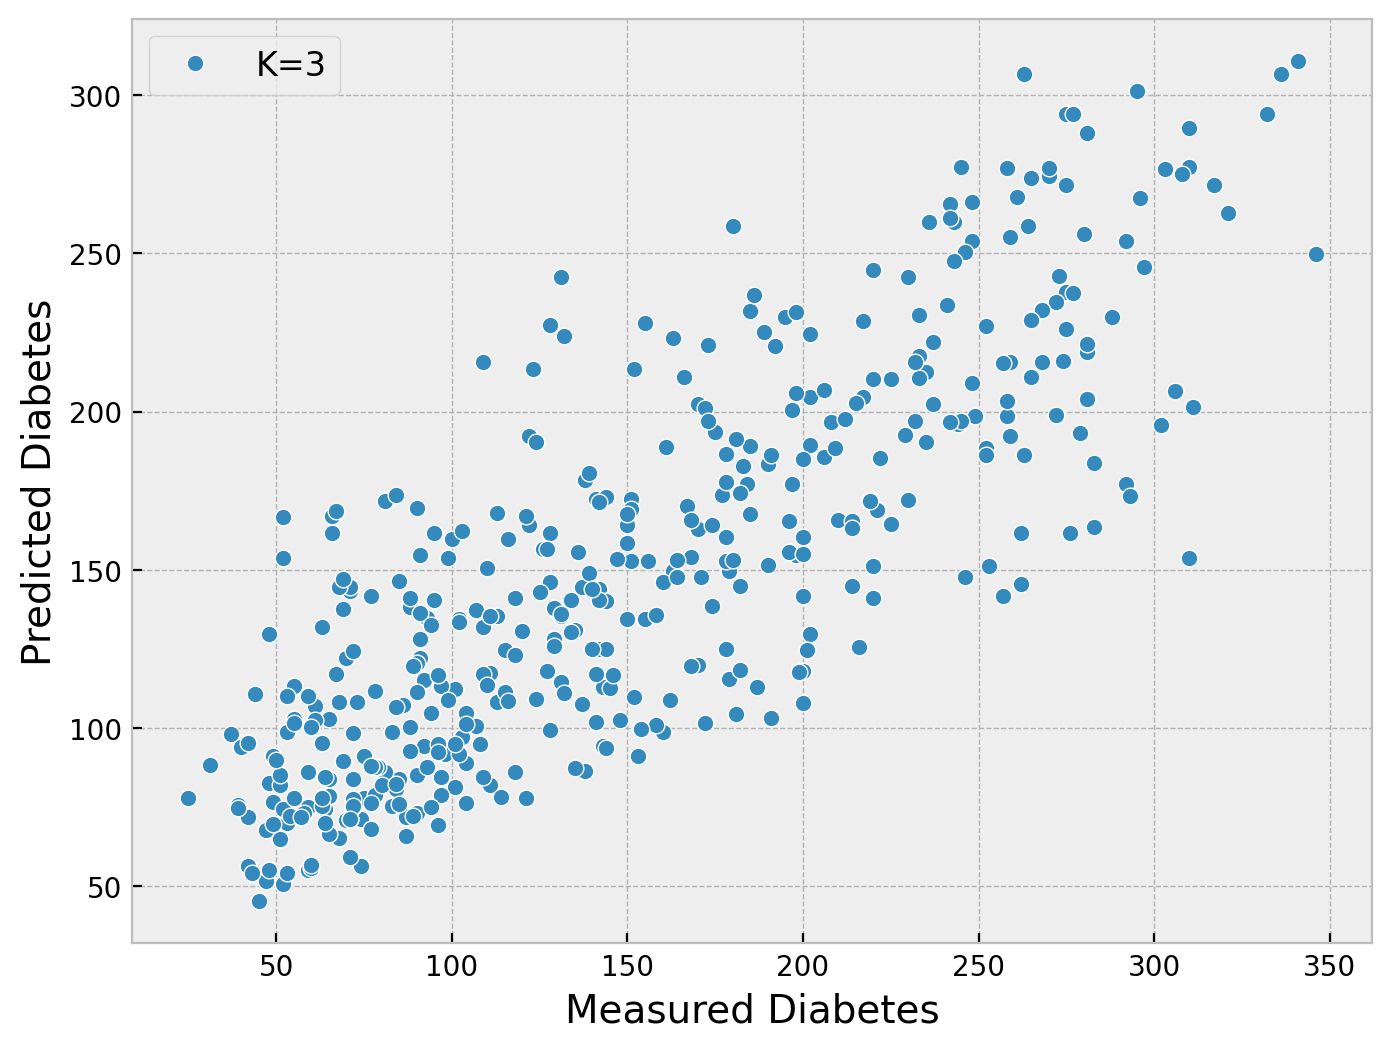

In [11]:
plt.plot(y, knn3_y_prediction, 'o', label='K=3')
plt.xlabel('Measured Diabetes')
plt.ylabel('Predicted Diabetes')
plt.legend();

But how many neighbors should we consider? i.e. K = ?

K is a hyperparameter that defines one of many possible KNN models.

# Exercise
Use a K=5 model to fit the relationship between patient features and diabetes score.

In [12]:
# 1. create the model...
#model = ...

# 2. fit the model to the data...
#...

# 3. compute the residuals...
#y_prediction = ...
#residuals = ...

# 4. compute the MSE...
#MSE = ...

# Exercise key
Use a K=5 model to fit the relationship between patient features and diabetes score.

In [13]:
# 1. create the model...
model = KNeighborsRegressor(n_neighbors=5)

# 2. fit the model to the data...
model.fit(X, y)

# 3. compute the residuals...
y_prediction = model.predict(X)
residuals = y - y_prediction

# 4. compute the MSE...
MSE = np.mean(residuals**2)

Compare some different values for K.

In [14]:
models = [
    KNeighborsRegressor(n_neighbors=1),
    KNeighborsRegressor(n_neighbors=2),
    KNeighborsRegressor(n_neighbors=10),
    KNeighborsRegressor(n_neighbors=50)
]

for model in models:
    model.fit(X, y);

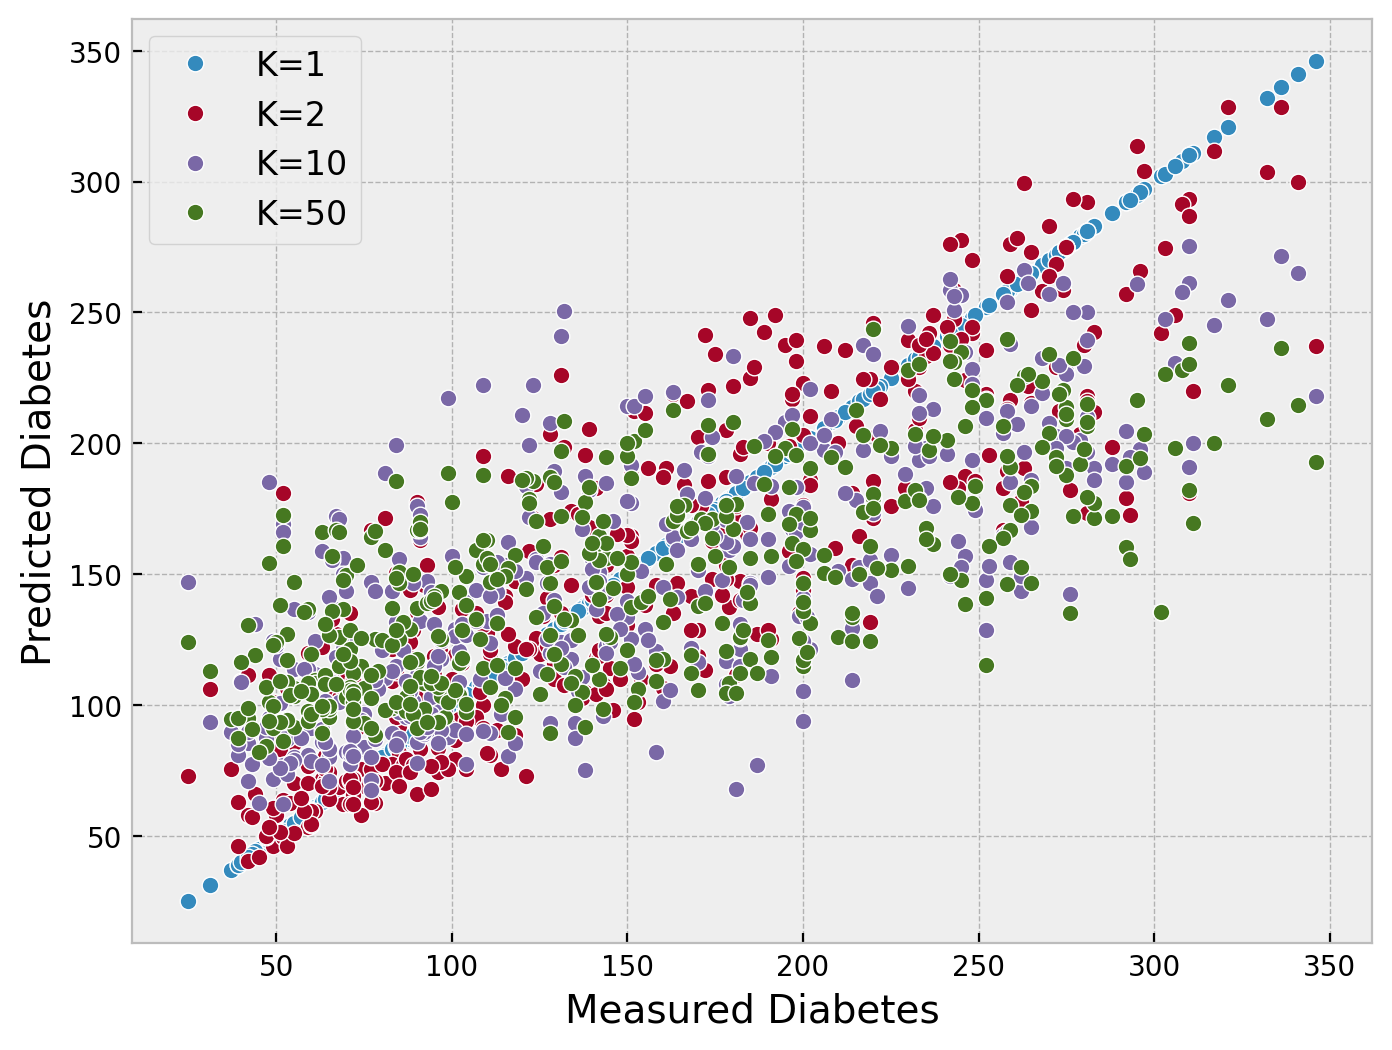

In [15]:
for model in models:
    plt.plot(y, model.predict(X), 'o', label=f'K={model.n_neighbors}')
plt.xlabel('Measured Diabetes')
plt.ylabel('Predicted Diabetes')
plt.legend();

In [16]:
K = []
MSE = []
for model in models:
    y_pred = model.predict(X)
    residuals = y - y_pred
    K.append(f'K={model.n_neighbors}')
    MSE.append(np.mean(residuals**2))

K, MSE

(['K=1', 'K=2', 'K=10', 'K=50'],
 [np.float64(0.0),
  np.float64(1471.9078054298643),
  np.float64(2744.486606334842),
  np.float64(3226.2884298642534)])

In [17]:
import pandas as pd
pd.DataFrame(MSE, index=K, columns=['MSE'])

,MSE
K=1,0.000000
K=2,1471.907805
K=10,2744.486606
K=50,3226.288430


But how do we determine which K is best?

Clearly, we can't use mean squared error (MSE), because K=1 would always be best even though it is just fitting noise in the data.

We'll discuss this next lecture...